# realestate


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

ModuleNotFoundError: No module named 'pandas'

In [2]:

df1 = pd.read_csv('C:\\Users\\georg\\OneDrive\\Desktop\\mini project\\data.csv')

df1.head()

NameError: name 'pd' is not defined

In [3]:
df1.shape


NameError: name 'df1' is not defined

In [4]:
df1.columns

NameError: name 'df1' is not defined

In [5]:
df1['area_type'].unique()

NameError: name 'df1' is not defined

In [6]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [7]:
df1['society'].value_counts()

society
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: count, Length: 2688, dtype: int64

In [8]:
df2 = df1.drop(['area_type','society','availability'],axis='columns')
df2.shape

(13320, 6)

In [9]:
df2.head()


,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


## data cleaning -null values


In [10]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [11]:
df2.shape

(13320, 6)

In [12]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [13]:
df3.shape

(12710, 6)

# feature engineering 1


### add bhk and modify total_sqrt

In [14]:
df3.head()


,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [15]:
bhk_modify=lambda x: int(x.split(" ")[0])

In [16]:
print(bhk_modify)

<function <lambda> at 0x000002A876F00D60>


In [17]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [92]:
bhk_modify=lambda x: int(x.split(" ")[0])
#df3['BHK']=df3['size'].apply(bhk_modify)
df3.loc[:, 'BHK'] = df3['size'].apply(bhk_modify)


In [93]:
df3['BHK'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [94]:
y=df3['total_sqft'].unique()

In [95]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [96]:
is_float(50)

True

In [97]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [98]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [99]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head()


,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [100]:
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [101]:
df4[~df4['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price,BHK


# Feature Engineering 2

### Add new feature called price per square feet

In [102]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()


,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [103]:
df5['price_per_sqft'].describe()

count    1.266800e+04
mean     6.876277e+03
std      2.263354e+04
min      2.678298e+02
25%      4.242721e+03
50%      5.376344e+03
75%      7.142857e+03
max      2.300000e+06
Name: price_per_sqft, dtype: float64

#### location


In [104]:
df5['location'].apply(lambda x:x.strip())

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13314           Green Glen Layout
13315                  Whitefield
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 12668, dtype: object

In [105]:
loc_status=df5['location'].value_counts()
loc_status

location
Whitefield           513
Sarjapur  Road       372
Electronic City      300
Kanakpura Road       259
Thanisandra          230
                    ... 
S R Layout             1
Meenakshi Layout       1
Vidyapeeta             1
Maruthi Extension      1
Abshot Layout          1
Name: count, Length: 1259, dtype: int64

In [106]:
len(loc_status[loc_status>10])

235

In [107]:
len(loc_status[loc_status<=10])

1024

In [108]:
len(loc_status)

1259

# Dimensionality Reduction

### reduce  category of location by marking  count<10 as otherloc


In [109]:
loc_less_10 = loc_status[loc_status<=10]
loc_less_10

location
Kalkere                 10
Nagappa Reddy Layout    10
Basapura                10
Doddaballapur           10
HAL 2nd Stage           10
                        ..
S R Layout               1
Meenakshi Layout         1
Vidyapeeta               1
Maruthi Extension        1
Abshot Layout            1
Name: count, Length: 1024, dtype: int64

In [110]:
len(df5.location.unique())

1259

In [111]:
deim_red= (lambda x:'other'
if x in loc_less_10 else x)


In [112]:
df5.location = df5.location.apply(deim_red)

In [113]:
len(df5.location.unique())

236

# Outlier Removal 

In [114]:
df5[df5.total_sqft/df5.BHK<300].head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


### these all are outliers ie values does not match

In [115]:
df5.shape

(12668, 8)

In [116]:
df6=df5[~(df5.total_sqft/df5.BHK<300)]
df6.shape
## instead of deletingcopying essential content to another object

(12013, 8)

# Outlier Removal Using Standard Deviation and Mean

In [117]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [118]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
       
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(9853, 8)

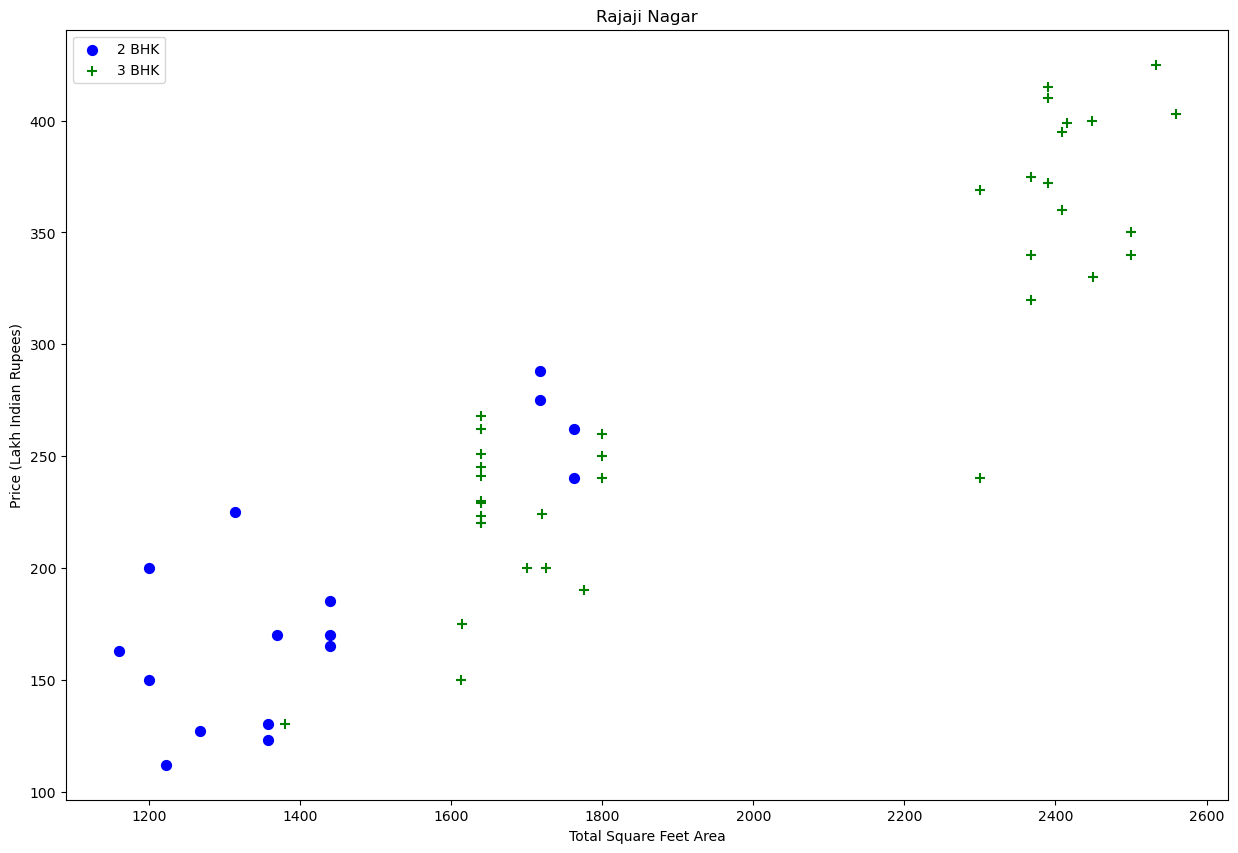

In [119]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

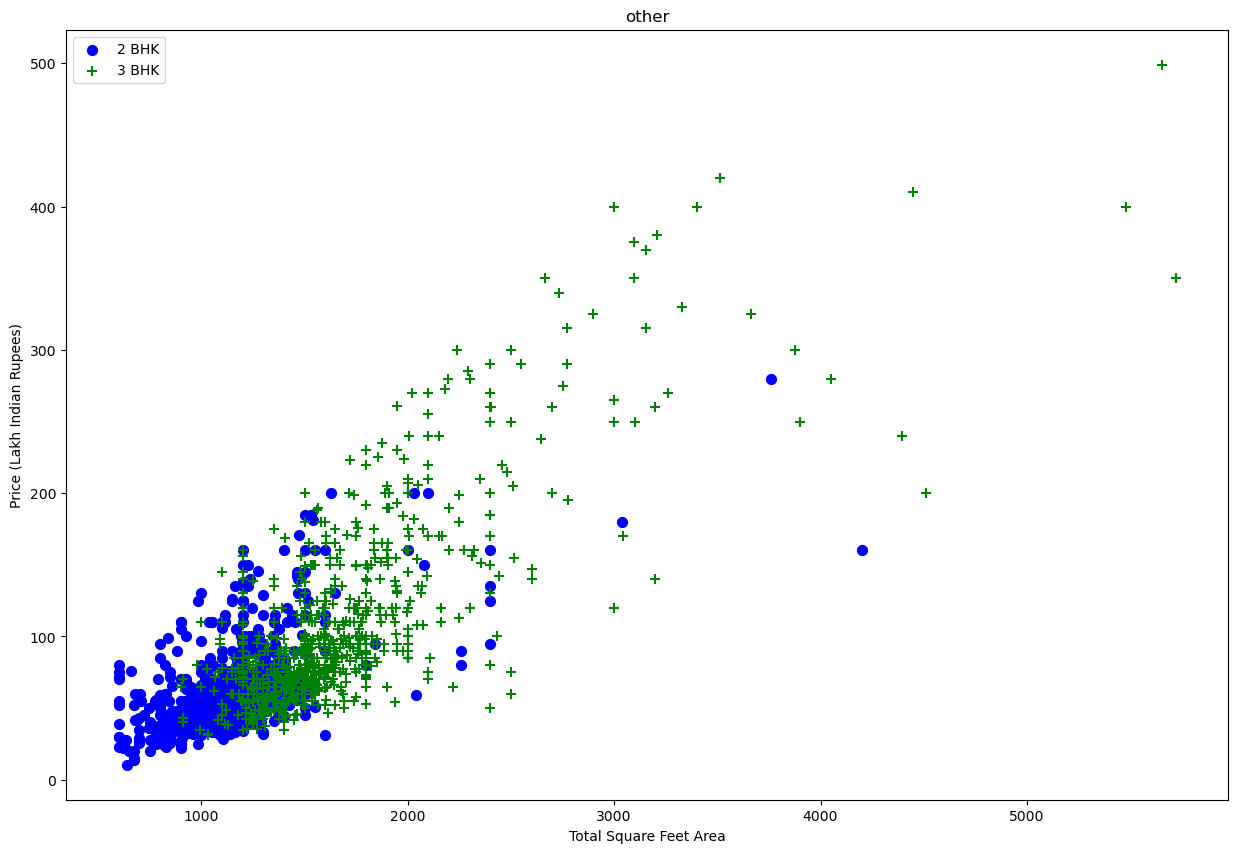

In [120]:
    
plot_scatter_chart(df7,"other")

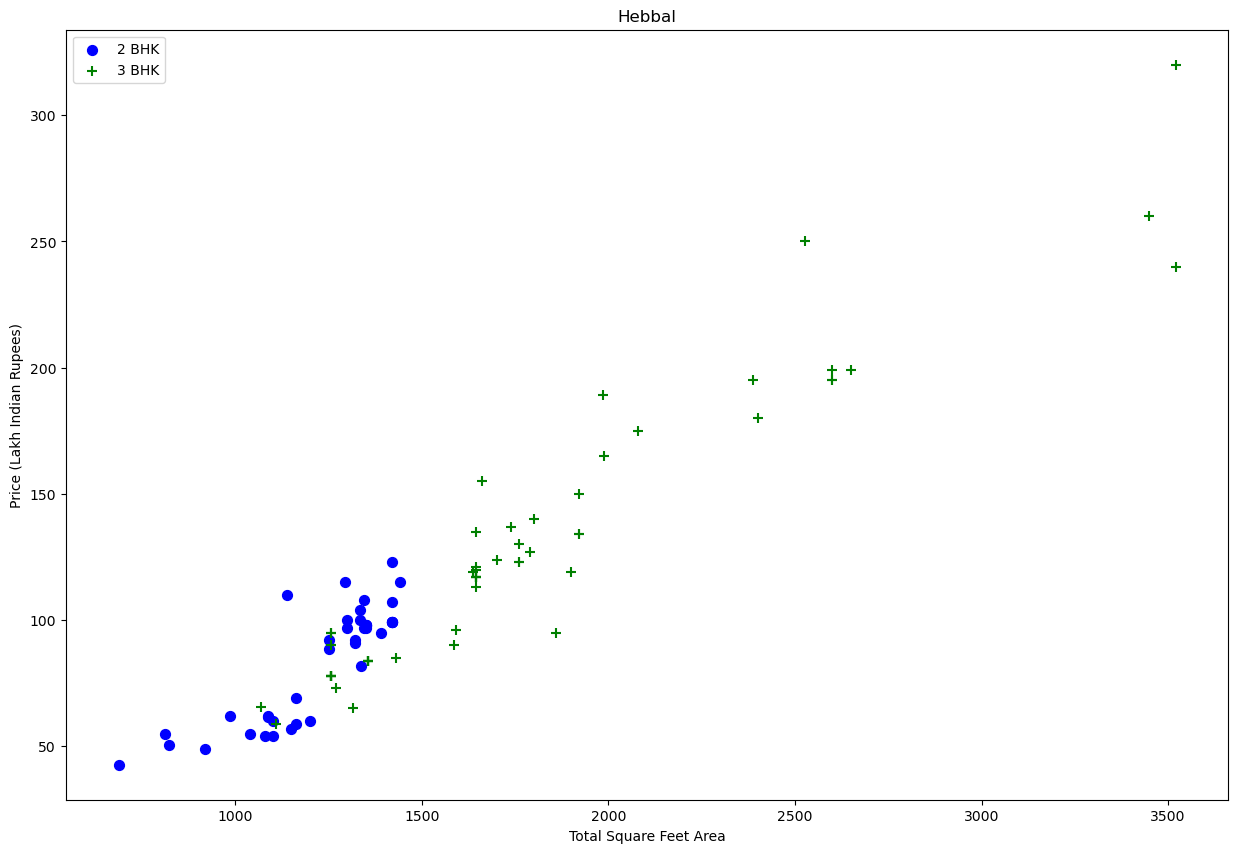

In [121]:
plot_scatter_chart(df7,"Hebbal")

In [122]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

#  {
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

In [123]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for BHK, BHK_df in location_df.groupby('BHK'):
            bhk_stats[BHK] = {
                'mean': np.mean(BHK_df.price_per_sqft),
                'std': np.std(BHK_df.price_per_sqft),
                'count': BHK_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(9533, 8)

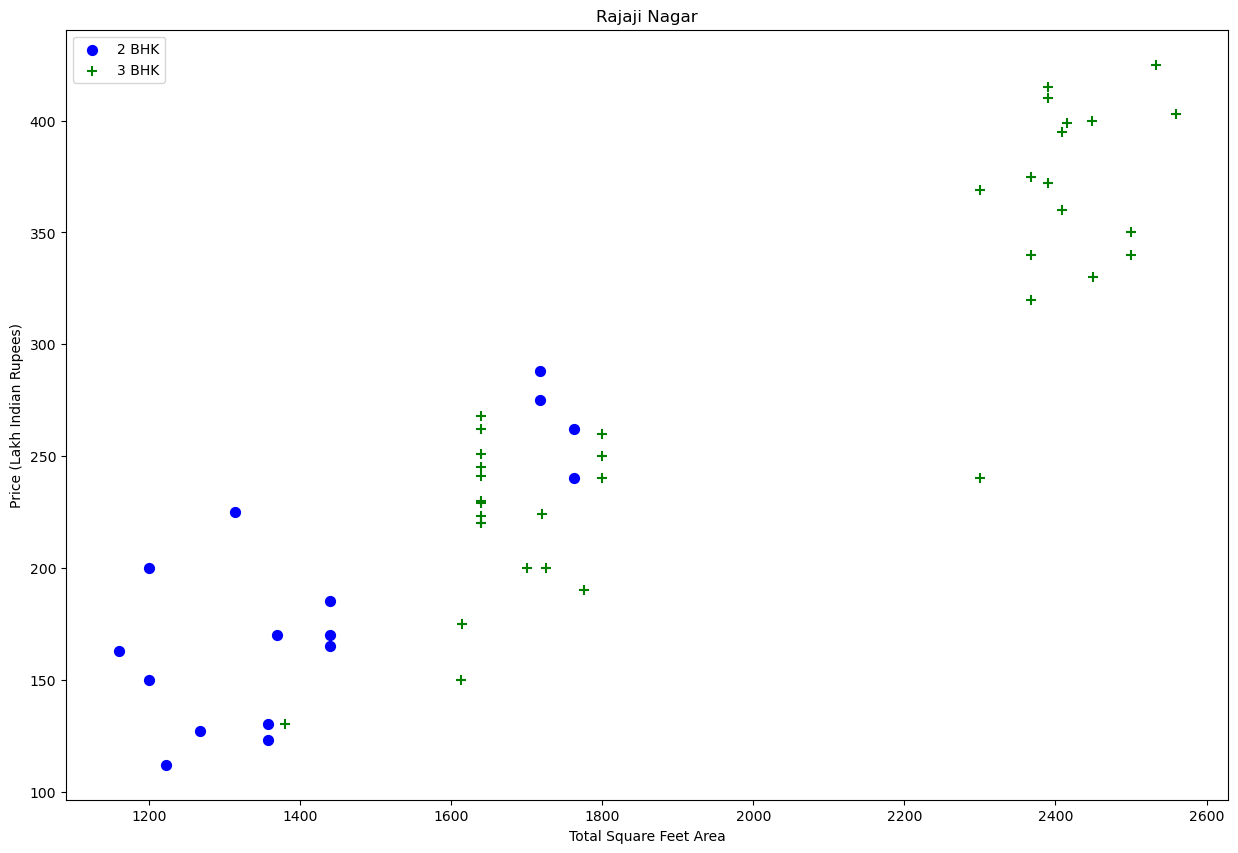

In [124]:
plot_scatter_chart(df8,"Rajaji Nagar")

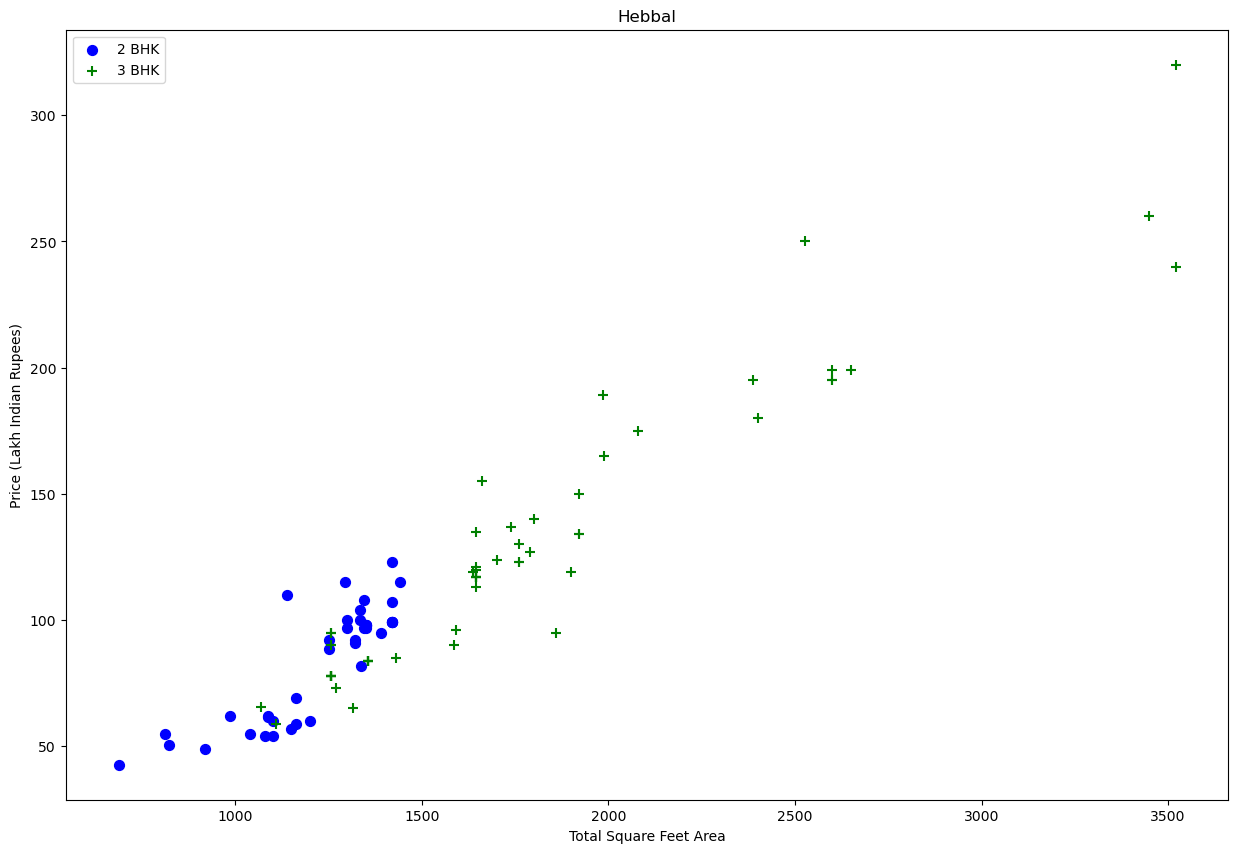

In [125]:

plot_scatter_chart(df8,"Hebbal")


Text(0, 0.5, 'Count')

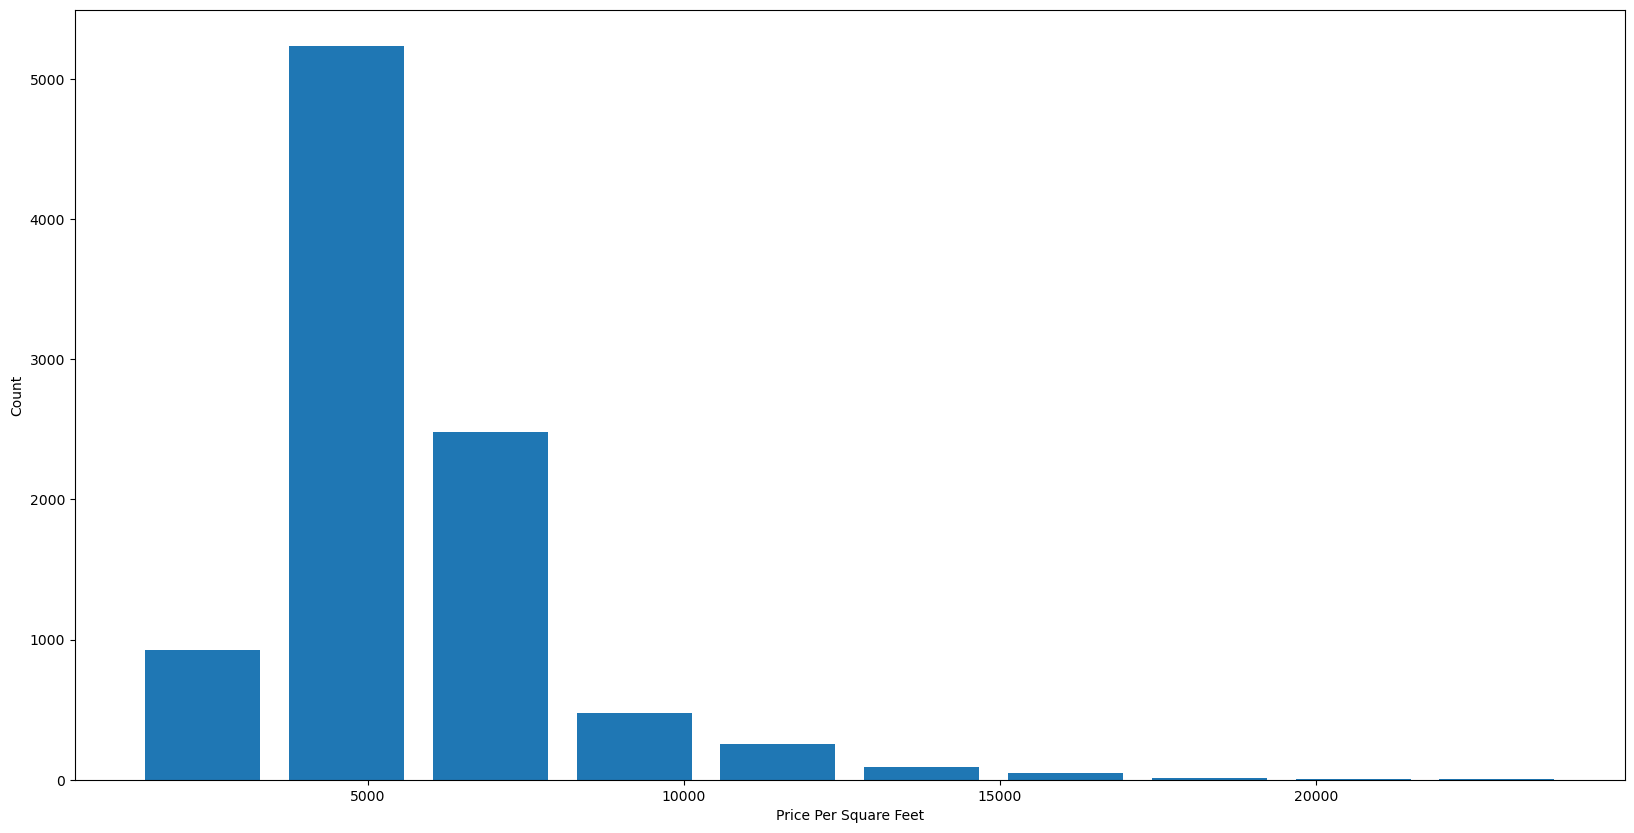

In [126]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#### most price per sqt feet is 5000

# Outlier Removal Using Bathrooms Feature

In [127]:
df8.bath.unique()

array([2., 3., 4., 8., 1., 5., 6., 7., 9.])

Text(0, 0.5, 'Count')

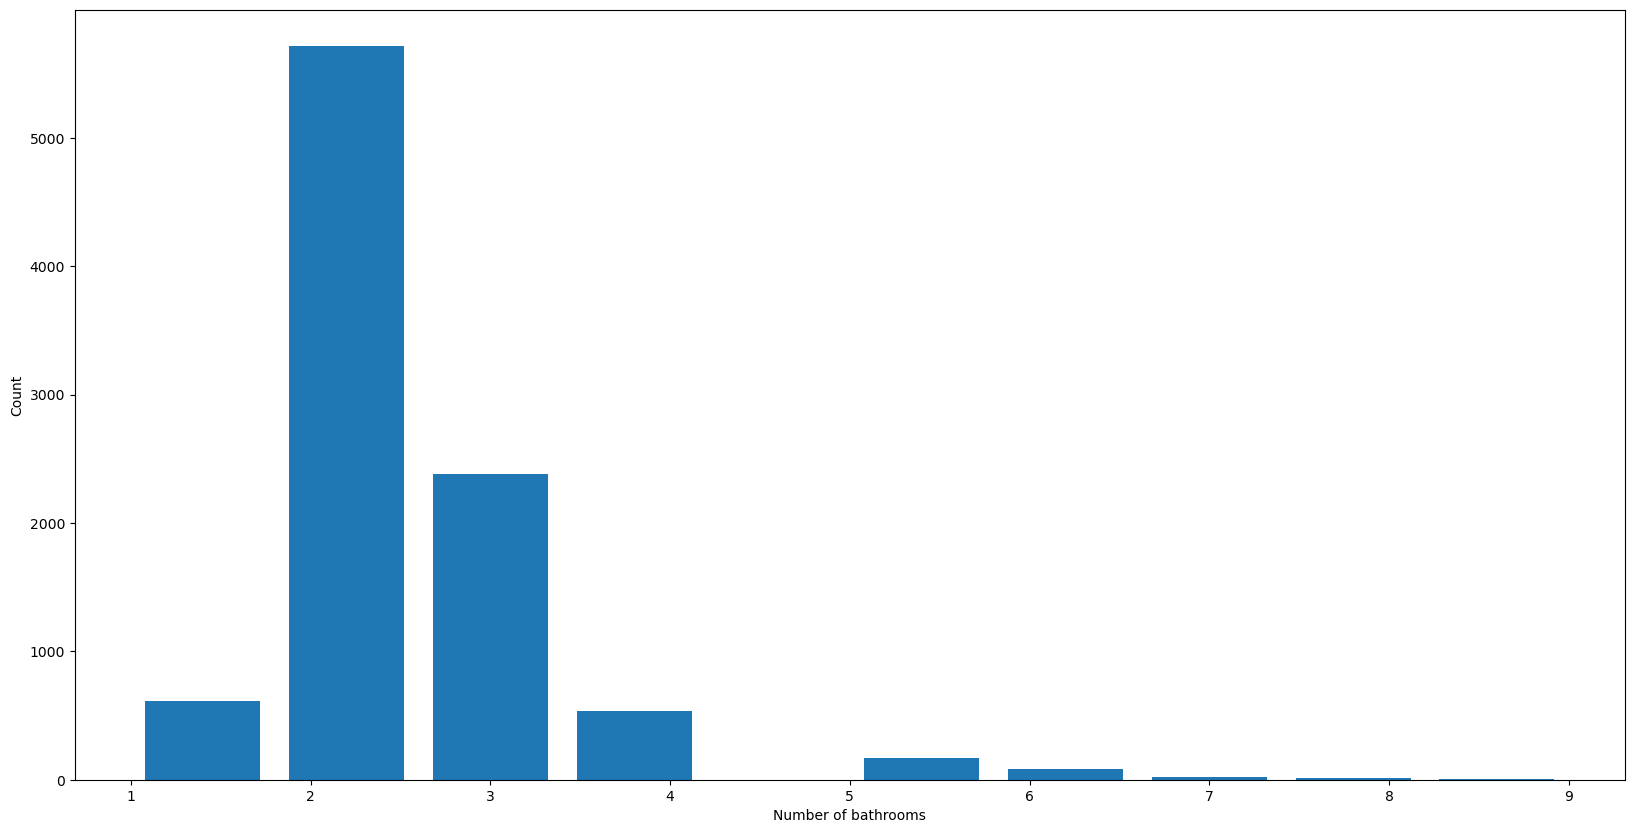

In [128]:

plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

##### most of the bathroom are of 2

In [129]:
df8[df8.bath>6]

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
46,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,3.0,451.0,6,15033.333333
47,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,3.0,450.0,6,18750.000000
292,Abbigere,8 Bedroom,3000.0,8.0,0.0,150.0,8,5000.000000
1229,Bommanahalli,8 Bedroom,3000.0,8.0,0.0,140.0,8,4666.666667
1552,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
1557,Chikkabanavar,8 Bedroom,4000.0,7.0,0.0,110.0,8,2750.000000
2785,Hegde Nagar,6 Bedroom,3000.0,7.0,2.0,210.0,6,7000.000000
3074,Horamavu Banaswadi,6 Bedroom,3800.0,8.0,0.0,200.0,6,5263.157895
3338,Indira Nagar,8 Bedroom,3250.0,8.0,1.0,600.0,8,18461.538462
3585,KR Puram,9 BHK,4600.0,9.0,2.0,200.0,9,4347.826087


# 

#### its is advised to have   no of bathroom just 2,3 more than bhk

In [130]:
df8[df8.bath>df8.BHK+2]

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
1552,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6432,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8074,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [131]:
df9= df8[df8.bath<df8.BHK+2]

In [132]:
df9.shape

(9457, 8)

In [133]:
df9.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,2.0,43.0,2,4540.654699


In [134]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,balcony,price,BHK
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2


# Hot Encoding For Location

In [135]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [136]:
df9.shape

(9457, 8)

In [137]:
dummies.shape

(9457, 236)

In [138]:

df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,balcony,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [139]:

df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,balcony,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [140]:
df12 = df11.drop('location',axis='columns')
df12.head(2)


,total_sqft,bath,balcony,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2.0,83.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#  model building

In [214]:
df100=df12
df12 = df12.drop(columns=['balcony'], errors='ignore')


In [215]:
df12.shape

(9457, 239)

In [216]:
print(X.shape)  # Should be (N, M) where N is the number of rows
print(y.shape)  # Should be (N, ) where N must be the same as X's row count


(9457, 238)
(9457,)


In [217]:

X=df12.drop(['price'],axis='columns')
X.head()
#independent variable Bhk,bath etc

,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,947.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [218]:
X.shape

(9457, 238)

In [219]:
y=df12.price
y.head()
#price -dependent variable

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [221]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7806005767082727

# K-fold to check accuracy

In [222]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80461242, 0.79330168, 0.79027646, 0.74898971, 0.83139253])

In [223]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index >= 0:
        x[loc_index] = True

    return lr_clf.predict([x])[0]

In [224]:
import warnings
warnings.simplefilter("ignore", UserWarning)


In [225]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

96.24516681842073

In [226]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

98.96636791619137

In [227]:
predict_price('Indira Nagar',1000, 3, 3)

162.66321341043914

In [228]:
predict_price('Indira Nagar',1000, 3, 3)

162.66321341043914

In [229]:
predict_price('Indira Nagar',1000, 4, 4)

165.38441450820977

In [ ]:
predict_price('Indira Nagar',900, 4, 4)

###  saving to pickle file for later use
    🔹 Why Use a Pickle File?
✅ Saves Time – You don't have to retrain models every time you run the program.

✅ Stores Complex Objects – Works with machine learning models, DataFrames, lists, etc.

✅ Easy to Load – Just unpickle (pickle.load()) and use.

In [231]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

#  export

In [233]:

if 'X' in globals():
    columns = {'data_columns': [col.lower() for col in X.columns]}
    with open("columns.json", "w") as f:
        json.dump(columns, f, indent=4)
else:
    print("Error: X is not defined")

    

#  end